# Proyecto de Machine Learning

**Autor:** Alessandro Ledesma  

## Objetivo
Este proyecto implementa modelos de machine learning para la predicción de cálculos biliares utilizando características clínicas de pacientes. Se aplicarán técnicas avanzadas incluyendo:

- XGBoost Classifier
- Redes Neuronales
- Selección de características con Algoritmos Genéticos

#### Nota: se usó prompt en Gemini sobre evaluar y entrenar el algoritmo de Redes Neuronales. Además, se preguntó sobre la construcción de gráficas para interpretar los resultados por cuenta propia. Asimismo, para el método de selección de características, se preguntó sobre técnicas comunes en otro proyectos y arrojó el uso de algoritmos genéticos, en base a esto se realizó la selección.

In [19]:
# === IMPORTACIÓN DE LIBRERÍAS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Configurar pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [20]:
# Definir ruta del archivo
data_path = "/Users/alessandroledesma/Desktop/proyecto-machine-learning/data/gallstone.csv"

# Cargar dataset (separado por punto y coma)
df = pd.read_csv(data_path, sep=';', encoding='utf-8')
print(f"Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")


# Mostrar información básica
print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Variables: {list(df.columns)}")
print(f"\nTipos de datos:")
print(df.dtypes)

Dataset cargado exitosamente
Dimensiones: 319 filas × 39 columnas

=== INFORMACIÓN BÁSICA DEL DATASET ===
Variables: ['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rat

In [21]:
# === ANÁLISIS EXPLORATORIO INICIAL ===
print("ANÁLISIS EXPLORATORIO INICIAL")

# Vista previa del dataset
print("\nPRIMERAS 5 FILAS:")
display(df.head())

print("\nINFORMACIÓN GENERAL:")
print(df.info())

print("\nESTADÍSTICAS DESCRIPTIVAS:")
display(df.describe())

ANÁLISIS EXPLORATORIO INICIAL

PRIMERAS 5 FILAS:


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),Visceral Fat Rating (VFR),Bone Mass (BM),Muscle Mass (MM),Obesity (%),Total Fat Content (TFC),Visceral Fat Area (VFA),Visceral Muscle Area (VMA) (Kg),Hepatic Fat Accumulation (HFA),Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,27.1,52.9,21.2,31.7,40.0,19.2,80.84,18.88,9,3.7,71.4,23.4,17.8,10.6,39.7,0,102.0,250.0,175.0,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,30.5,43.1,19.5,23.6,45.0,32.8,67.20,16.68,15,3.2,60.3,38.8,31.0,18.4,32.7,0,94.0,172.0,108.0,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,31.2,47.2,20.1,27.1,43.0,27.3,72.67,16.35,15,3.3,62.9,41.7,24.9,16.2,34.0,0,103.0,179.0,124.0,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,24.0,41.4,17.0,24.4,41.0,15.8,84.19,16.90,6,2.9,54.1,9.0,10.7,6.5,29.2,1,69.0,173.0,73.0,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,28.3,51.4,20.0,31.4,39.0,20.0,80.02,16.81,8,3.5,68.2,28.6,17.9,10.4,37.4,2,109.0,205.0,154.0,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6



INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight               

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),Visceral Fat Rating (VFR),Bone Mass (BM),Muscle Mass (MM),Obesity (%),Total Fat Content (TFC),Visceral Fat Area (VFA),Visceral Muscle Area (VMA) (Kg),Hepatic Fat Accumulation (HFA),Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,28.877116,40.587774,17.071160,23.634483,42.212038,28.274984,71.638245,15.938809,9.078370,2.803292,54.273041,35.850125,23.487774,12.171599,30.403448,1.150470,108.688715,203.495298,126.652351,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,5.313707,7.930235,3.161857,5.349332,3.244470,8.444417,8.437598,2.334744,4.332501,0.509467,10.603833,109.799718,9.607607,5.262178,4.460530,1.059217,44.848714,45.758501,38.541175,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,17.400000,13.000000,9.000000,13.800000,29.230000,6.300000,48.990000,5.560000,1.000000,1.400000,4.700000,0.400000,3.100000,0.900000,18.900000,0.000000,69.000000,60.000000,11.000000,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,25.250000,34.200000,14.800000,19.300000,40.075000,22.025000,65.165000,14.465000,6.000000,2.400000,45.800000,13.900000,17.000000,8.570000,27.250000,0.000000,92.000000,172.000000,100.500000,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,28.300000,39.800000,17.100000,23.000000,42.000000,27.820000,72.110000,15.870000,9.000000,2.800000,53.900000,25.600000,22.600000,11.590000,30.408108,1.000000,98.000000,198.000000,122.000000,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,31.850000,47.000000,19.400000,27.550000,44.000000,34.810000,77.850000,17.430000,12.000000,3.200000,62.600000,41.750000,28.550000,15.100000,33.800000,2.000000,109.000000,233.000000,151.000000,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,49.700000,66.200000,27.800000,57.100000,52.000000,50.920000,93.670000,24.810000,31.000000,4.000000,78.800000,1954.000000,62.500000,41.000000,41.100000,4.000000,575.000000,360.000000,293.000000,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [22]:
# === ANÁLISIS DE VALORES FALTANTES ===
print("\nVALORES FALTANTES:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    missing_df = pd.DataFrame({
        'Variable': missing_values.index,
        'Valores_Faltantes': missing_values.values,
        'Porcentaje': (missing_values.values / len(df)) * 100
    }).sort_values('Valores_Faltantes', ascending=False)
    display(missing_df[missing_df['Valores_Faltantes'] > 0])
else:
    print("No hay valores faltantes en el dataset")

# Análisis de la variable objetivo
print("\nANÁLISIS DE LA VARIABLE OBJETIVO:")
target_col = 'Gallstone Status'
target_dist = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

print(f"Distribución de {target_col}:")
for val, count, pct in zip(target_dist.index, target_dist.values, target_pct.values):
    label = "Con cálculos" if val == 1 else "Sin cálculos"
    print(f"  {label} ({val}): {count} casos ({pct:.1f}%)")

# Verificar balance de clases
minority_class = target_dist.min()
majority_class = target_dist.max()
imbalance_ratio = majority_class / minority_class
print(f"\nBalance de clases:")
print(f"  Ratio de desbalance: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print(f"Dataset desbalanceado")
else:
    print(f"Dataset balanceado")


VALORES FALTANTES:
No hay valores faltantes en el dataset

ANÁLISIS DE LA VARIABLE OBJETIVO:
Distribución de Gallstone Status:
  Sin cálculos (0): 161 casos (50.5%)
  Con cálculos (1): 158 casos (49.5%)

Balance de clases:
  Ratio de desbalance: 1.02:1
Dataset balanceado


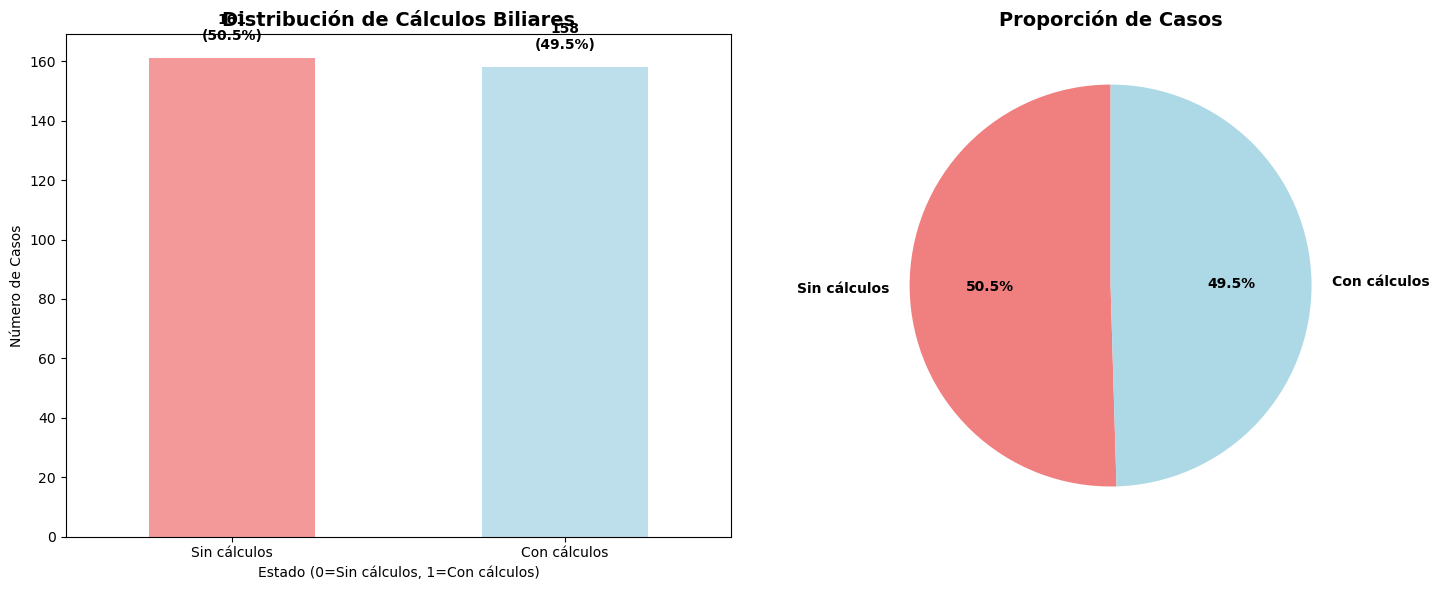

In [23]:
# === VISUALIZACIÓN DE LA VARIABLE OBJETIVO ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_dist.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'], alpha=0.8)
ax1.set_title('Distribución de Cálculos Biliares', fontsize=14, fontweight='bold')
ax1.set_xlabel('Estado (0=Sin cálculos, 1=Con cálculos)')
ax1.set_ylabel('Número de Casos')
ax1.set_xticklabels(['Sin cálculos', 'Con cálculos'], rotation=0)

# Agregar valores en las barras
for i, v in enumerate(target_dist.values):
    ax1.text(i, v + 5, f'{v}\n({target_pct.iloc[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
ax2.pie(target_dist.values, labels=['Sin cálculos', 'Con cálculos'], 
       autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], 
       startangle=90, textprops={'fontweight': 'bold'})
ax2.set_title('Proporción de Casos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Análisis de Correlaciones y Características

Analizamos las correlaciones entre variables y identificamos los factores más relacionados con la presencia de cálculos biliares.

In [24]:
# === ANÁLISIS DE CORRELACIONES ===
print("ANÁLISIS DE CORRELACIONES")

# Preparar datos numéricos
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas encontradas: {len(numeric_cols)}")

# Calcular matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Correlaciones con la variable objetivo
target_corr = correlation_matrix['Gallstone Status'].abs().sort_values(ascending=False)
target_corr = target_corr.drop('Gallstone Status')  # Remover auto-correlación

print(f"\nTOP 10 CORRELACIONES CON VARIABLE OBJETIVO:")
print("-" * 60)
for i, (var, corr) in enumerate(target_corr.head(10).items(), 1):
    direction = "positiva" if correlation_matrix.loc['Gallstone Status', var] > 0 else "negativa"
    print(f"{i:2d}. {var:<35} | {corr:.3f} ({direction})")

# Identificar correlaciones altas entre variables
print(f"\nCORRELACIONES ALTAS ENTRE VARIABLES (>0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], corr_val))

if high_corr_pairs:
    for feat1, feat2, corr_val in high_corr_pairs[:5]:  # Mostrar solo las primeras 5
        print(f"  • {feat1} - {feat2}: {corr_val:.3f}")
else:
    print("No se encontraron correlaciones muy altas")

ANÁLISIS DE CORRELACIONES
Variables numéricas encontradas: 39

TOP 10 CORRELACIONES CON VARIABLE OBJETIVO:
------------------------------------------------------------
 1. Vitamin D                           | 0.355 (negativa)
 2. C-Reactive Protein (CRP)            | 0.282 (positiva)
 3. Lean Mass (LM) (%)                  | 0.226 (negativa)
 4. Total Body Fat Ratio (TBFR) (%)     | 0.225 (positiva)
 5. Bone Mass (BM)                      | 0.217 (negativa)
 6. Hemoglobin (HGB)                    | 0.197 (negativa)
 7. Extracellular Water (ECW)           | 0.178 (negativa)
 8. Total Fat Content (TFC)             | 0.170 (positiva)
 9. Extracellular Fluid/Total Body Water (ECF/TBW) | 0.170 (negativa)
10. Hyperlipidemia                      | 0.162 (positiva)

CORRELACIONES ALTAS ENTRE VARIABLES (>0.8):
  • Weight - Visceral Fat Area (VFA): 0.882
  • Body Mass Index (BMI) - Total Fat Content (TFC): 0.903
  • Body Mass Index (BMI) - Visceral Fat Area (VFA): 0.850
  • Total Body Water (TB


Generando matriz de correlación visual...


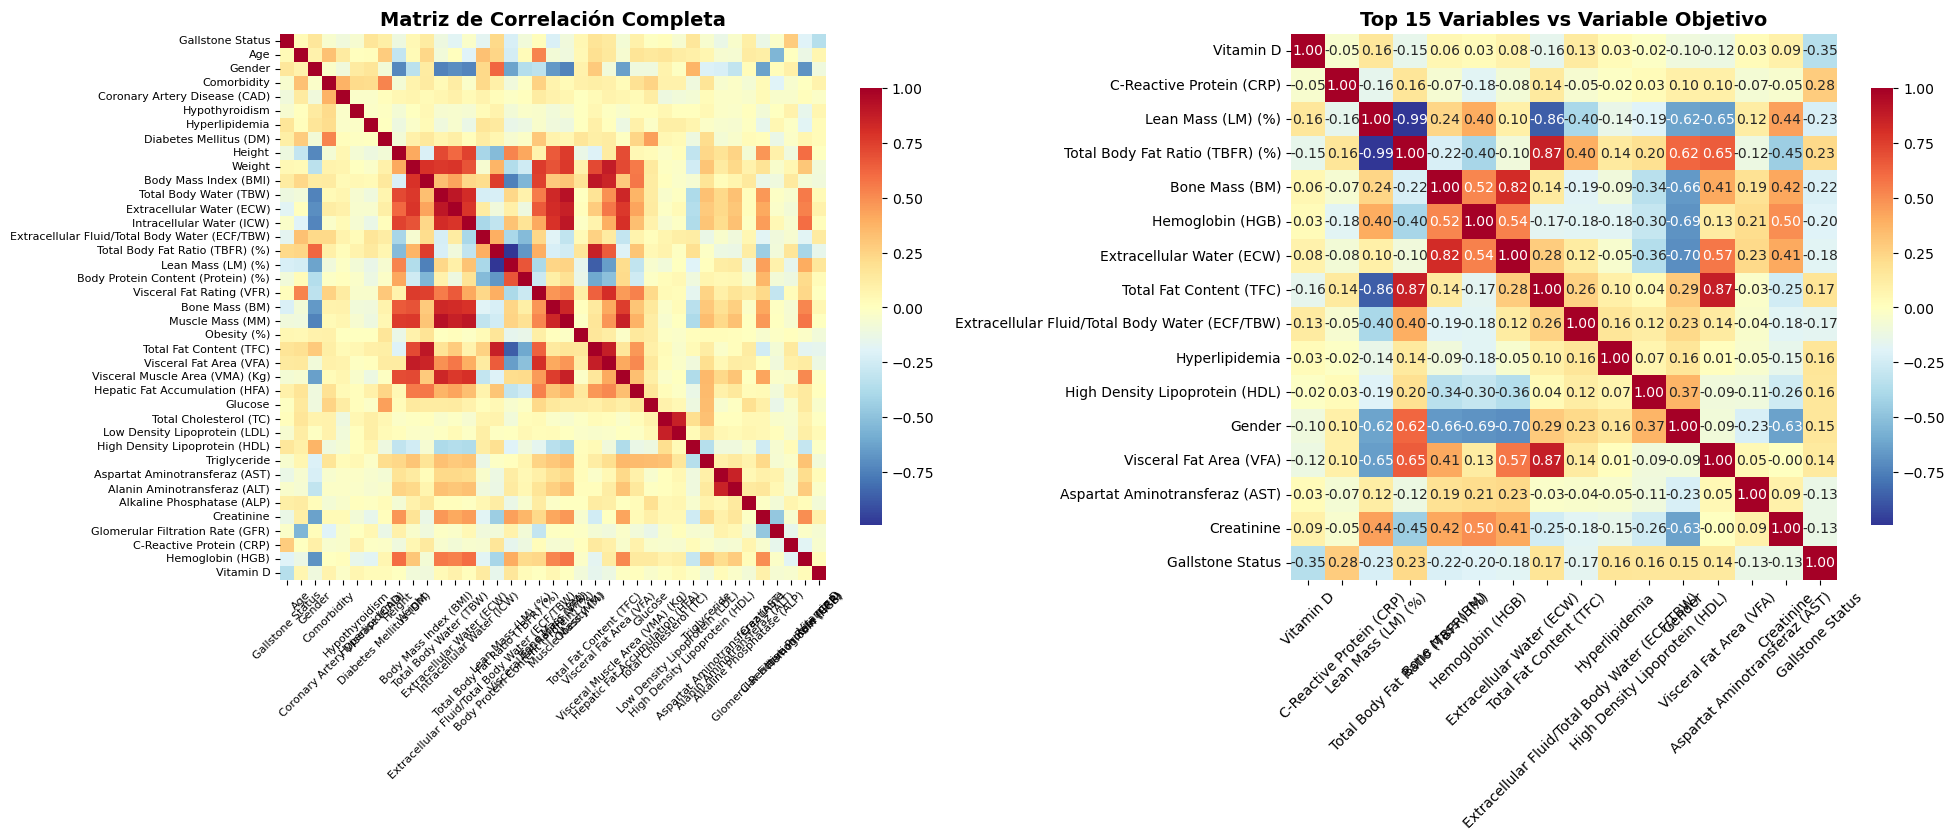

In [25]:
# === MATRIZ DE CORRELACIÓN VISUAL ===
print("\nGenerando matriz de correlación visual...")

# Matriz de correlación completa (puede ser grande)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Matriz completa (más pequeña para legibilidad)
sns.heatmap(correlation_matrix, cmap='RdYlBu_r', center=0, 
           square=True, cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title('Matriz de Correlación Completa', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].tick_params(axis='y', rotation=0, labelsize=8)

# Correlaciones más importantes con variable objetivo
top_features = target_corr.head(15).index.tolist() + ['Gallstone Status']
corr_subset = correlation_matrix.loc[top_features, top_features]

sns.heatmap(corr_subset, annot=True, cmap='RdYlBu_r', center=0, 
           square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[1])
axes[1].set_title('Top 15 Variables vs Variable Objetivo', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', rotation=0, labelsize=10)

plt.tight_layout()
plt.show()

## 3. Análisis de Distribuciones de Variables Clave

Examinamos las distribuciones de las variables más correlacionadas con gallstone y identificamos patrones.

ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CLAVE
Analizando las 8 variables más correlacionadas:
  1. Vitamin D: -0.355
  2. C-Reactive Protein (CRP): 0.282
  3. Lean Mass (LM) (%): -0.226
  4. Total Body Fat Ratio (TBFR) (%): 0.225
  5. Bone Mass (BM): -0.217
  6. Hemoglobin (HGB): -0.197
  7. Extracellular Water (ECW): -0.178
  8. Total Fat Content (TFC): 0.170


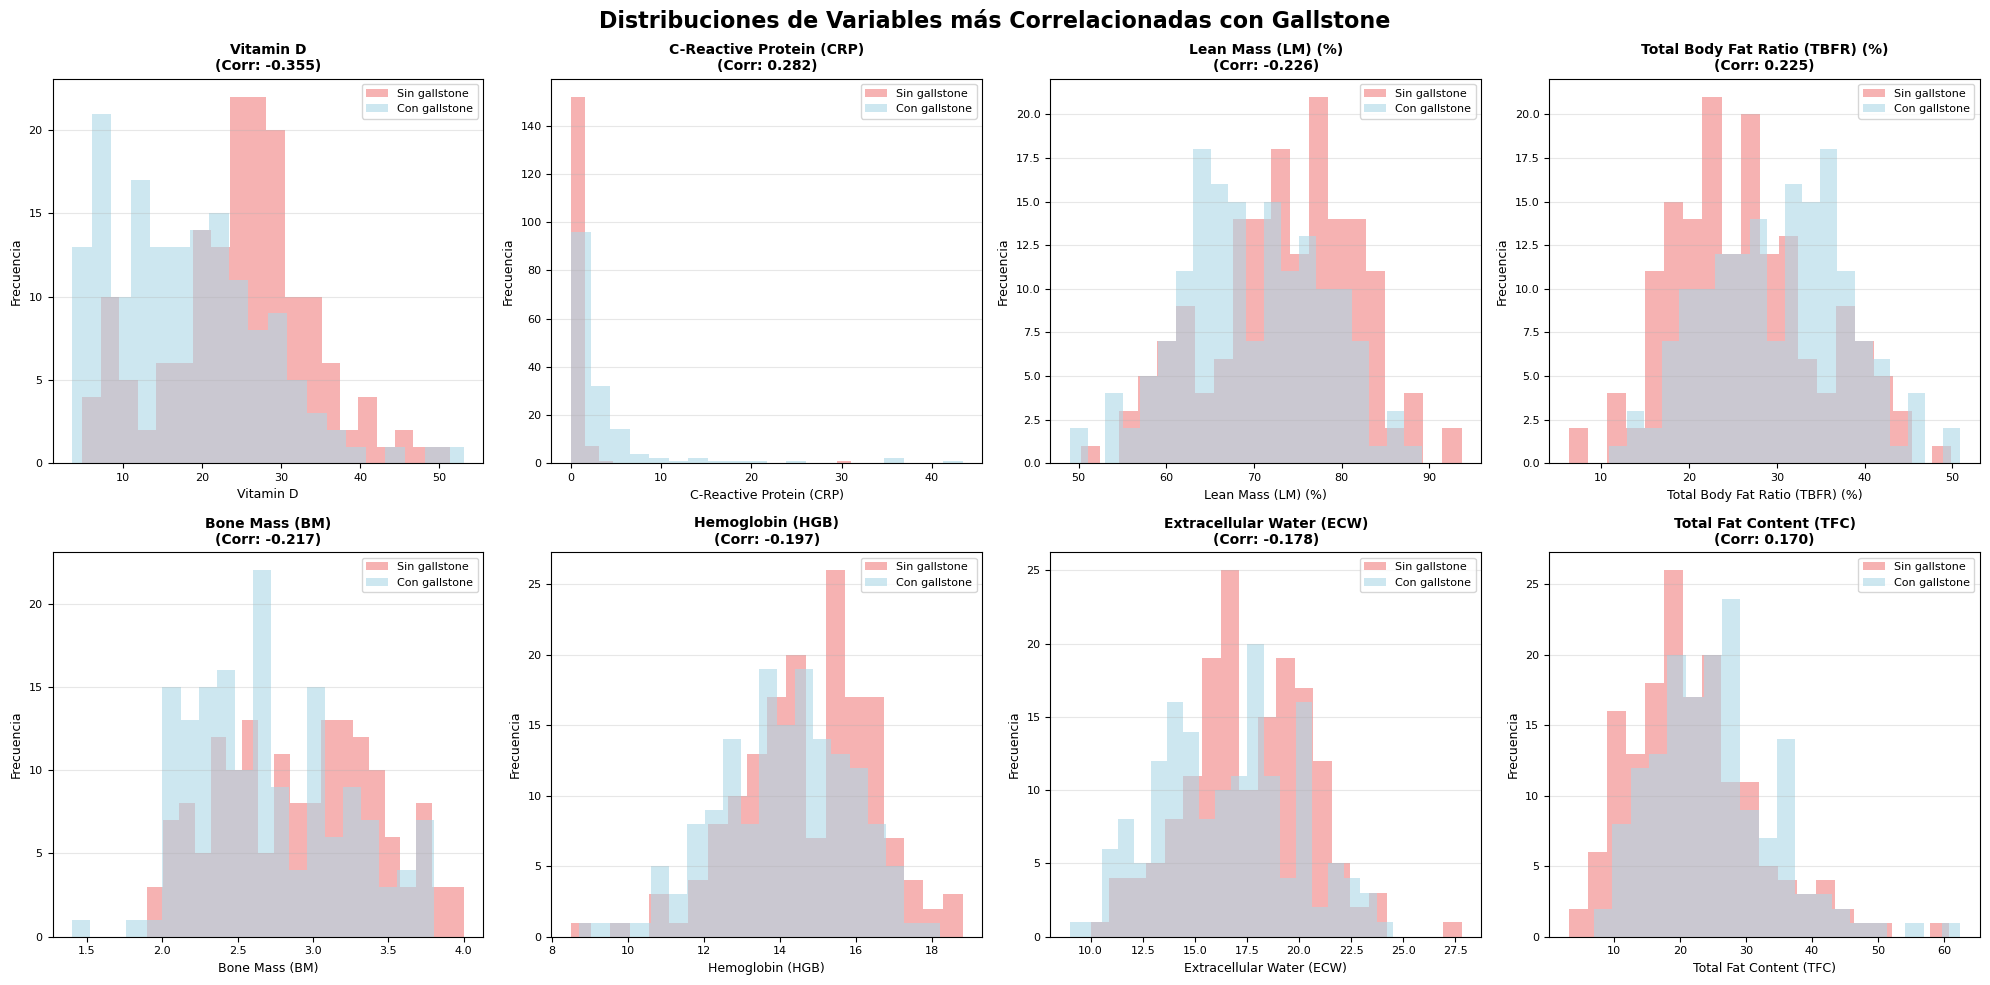

In [26]:
# === ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CLAVE ===
print("ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CLAVE")

# Seleccionar top variables correlacionadas
top_vars = target_corr.head(8).index.tolist()
print(f"Analizando las 8 variables más correlacionadas:")
for i, var in enumerate(top_vars, 1):
    corr_val = correlation_matrix.loc['Gallstone Status', var]
    print(f"  {i}. {var}: {corr_val:.3f}")

# Visualizar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, var in enumerate(top_vars):
    # Histograma por clase
    for status in [0, 1]:
        subset = df[df['Gallstone Status'] == status][var]
        label = 'Sin gallstone' if status == 0 else 'Con gallstone'
        color = 'lightcoral' if status == 0 else 'lightblue'
        axes[i].hist(subset, bins=20, alpha=0.6, label=label, color=color)
    
    axes[i].set_title(f'{var}\n(Corr: {correlation_matrix.loc["Gallstone Status", var]:.3f})', 
                     fontsize=10, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=9)
    axes[i].set_ylabel('Frecuencia', fontsize=9)
    axes[i].legend(fontsize=8)
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].tick_params(axis='both', labelsize=8)

plt.suptitle('Distribuciones de Variables más Correlacionadas con Gallstone', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Preprocesamiento Avanzado y Feature Engineering

### 4.1 Importación de Librerías Especializadas
Importamos librerías avanzadas para machine learning, incluyendo XGBoost y algoritmos genéticos.

In [27]:
# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.neural_network import MLPClassifier
from collections import Counter
import xgboost as xgb
from deap import base, creator, tools, algorithms
import random

### 4.2 Feature Engineering
Creamos nuevas características basadas en las variables más importantes.

In [28]:
# === FEATURE ENGINEERING ===
print("FEATURE ENGINEERING")

df_features = df.copy()
initial_features = len(df_features.columns)

print(f"Características iniciales: {initial_features}")

# 1. Transformaciones logarítmicas para variables con sesgo
for col in ['BMI', 'Glucose', 'Triglyceride'][:3]:  # Solo las más importantes
    col_name = next((c for c in df_features.columns if col.lower() in c.lower()), None)
    if col_name and col_name in df_features.columns:
        if (df_features[col_name] > 0).all():
            df_features[f'{col_name}_log'] = np.log1p(df_features[col_name])

# 2. Variables al cuadrado para capturar efectos no lineales
for col in top_vars[:3]:  # Top 3 variables más correlacionadas
    if col in df_features.columns:
        df_features[f'{col}_squared'] = df_features[col] ** 2

# 3. Ratios entre variables importantes
if 'Body Mass Index (BMI)' in df_features.columns and 'Age' in df_features.columns:
    df_features['BMI_Age_ratio'] = df_features['Body Mass Index (BMI)'] / (df_features['Age'] + 1)

if 'Glucose' in df_features.columns and 'Total Cholesterol (TC)' in df_features.columns:
    df_features['Glucose_Chol_ratio'] = df_features['Glucose'] / (df_features['Total Cholesterol (TC)'] + 1)

# 4. Índices de salud compuestos
if all(col in df_features.columns for col in ['Body Mass Index (BMI)', 'Total Body Fat Ratio (TBFR) (%)']):
    df_features['Body_Health_Index'] = (
        df_features['Body Mass Index (BMI)'] * 0.6 +
        df_features['Total Body Fat Ratio (TBFR) (%)'] * 0.4
    )

if all(col in df_features.columns for col in ['Glucose', 'Total Cholesterol (TC)', 'Triglyceride']):
    # Normalizar variables
    glucose_norm = df_features['Glucose'] / df_features['Glucose'].max()
    chol_norm = df_features['Total Cholesterol (TC)'] / df_features['Total Cholesterol (TC)'].max()
    trig_norm = df_features['Triglyceride'] / df_features['Triglyceride'].max()
    
    df_features['Metabolic_Index'] = (glucose_norm + chol_norm + trig_norm) / 3

final_features = len(df_features.columns)
new_features_count = final_features - initial_features

print(f"\nResumen:")
print(f"Características iniciales: {initial_features}")
print(f"Características finales: {final_features}")
print(f"Nuevas características: {new_features_count}")

# Actualizar la lista de características numéricas
numeric_cols = df_features.select_dtypes(include=[np.number]).columns.tolist()

FEATURE ENGINEERING
Características iniciales: 39

Resumen:
Características iniciales: 39
Características finales: 49
Nuevas características: 10


### 4.3 Análisis de las Nuevas Características
Analizamos las características creadas para verificar su relevancia.

In [29]:
# === ANÁLISIS DE NUEVAS CARACTERÍSTICAS ===
print("ANÁLISIS DE NUEVAS CARACTERÍSTICAS")

# Identificar nuevas características creadas
original_cols = set(df.columns)
new_cols = [col for col in df_features.columns if col not in original_cols]

print(f"Nuevas características creadas: {len(new_cols)}")
print("\nLista de nuevas características:")
for i, col in enumerate(new_cols, 1):
    print(f"  {i:2d}. {col}")

# Analizar correlación de nuevas características con variable objetivo
if len(new_cols) > 0:
    numeric_new_cols = [col for col in new_cols if col in df_features.select_dtypes(include=[np.number]).columns]
    
    if len(numeric_new_cols) > 0:
        print(f"\nCorrelación con variable objetivo:")
        correlations = []
        for col in numeric_new_cols:
            corr = df_features[col].corr(df_features['Gallstone Status'])
            correlations.append((col, abs(corr), corr))
        
        # Ordenar por correlación absoluta
        correlations.sort(key=lambda x: x[1], reverse=True)
        
        print(f"Top {min(10, len(correlations))} nuevas características más correlacionadas:")
        for i, (col, abs_corr, corr) in enumerate(correlations[:10], 1):
            direction = "positiva" if corr > 0 else "negativa"
            print(f"  {i:2d}. {col:<30} | {abs_corr:.3f} ({direction})")

# Preparar datos para modelos
X_features = df_features.drop(columns=['Gallstone Status'], errors='ignore')
y_target = df_features['Gallstone Status']
X_numeric_only = X_features.select_dtypes(include=[np.number])

print(f"\nCaracterísticas para modelos: {X_numeric_only.shape[1]}")
print(f"Muestras: {len(y_target)}")
print(f"Distribución: {Counter(y_target)}")

ANÁLISIS DE NUEVAS CARACTERÍSTICAS
Nuevas características creadas: 10

Lista de nuevas características:
   1. Body Mass Index (BMI)_log
   2. Glucose_log
   3. Triglyceride_log
   4. Vitamin D_squared
   5. C-Reactive Protein (CRP)_squared
   6. Lean Mass (LM) (%)_squared
   7. BMI_Age_ratio
   8. Glucose_Chol_ratio
   9. Body_Health_Index
  10. Metabolic_Index

Correlación con variable objetivo:
Top 10 nuevas características más correlacionadas:
   1. Vitamin D_squared              | 0.311 (negativa)
   2. Lean Mass (LM) (%)_squared     | 0.229 (negativa)
   3. Body_Health_Index              | 0.187 (positiva)
   4. C-Reactive Protein (CRP)_squared | 0.134 (positiva)
   5. Body Mass Index (BMI)_log      | 0.128 (positiva)
   6. BMI_Age_ratio                  | 0.029 (positiva)
   7. Metabolic_Index                | 0.022 (negativa)
   8. Triglyceride_log               | 0.014 (negativa)
   9. Glucose_log                    | 0.011 (negativa)
  10. Glucose_Chol_ratio             | 0.00

## 5. Selección de Características con Algoritmos Genéticos

### 5.1 Implementación de Algoritmo Genético
Utilizamos técnicas heurísticas avanzadas para optimizar la selección de características.

In [30]:
# === ALGORITMO GENÉTICO PARA FEATURE SELECTION ===
print("ALGORITMO GENÉTICO PARA FEATURE SELECTION")

# Preparar datos para la selección de características
X_features = df_features.drop(columns=['Gallstone Status'], errors='ignore')
y_target = df_features['Gallstone Status']
X_numeric_only = X_features.select_dtypes(include=[np.number])

# Usar el dataset para la selección de características
X_for_selection, y_for_selection = X_numeric_only, y_target
n_features = X_for_selection.shape[1]

print(f"Número de características: {n_features}")

# Solo proceder si tenemos suficientes características y DEAP está disponible
if n_features > 5:
    try:
        # Limpiar creators previos si existen
        if hasattr(creator, "FitnessMax"):
            del creator.FitnessMax
        if hasattr(creator, "Individual"):
            del creator.Individual
            
        # Definir el problema de optimización
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar fitness
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        # Configurar el toolbox
        toolbox = base.Toolbox()
        
        # Crear individuos (vectores binarios representando selección de features)
        toolbox.register("attr_bool", random.randint, 0, 1)
        toolbox.register("individual", tools.initRepeat, creator.Individual, 
                        toolbox.attr_bool, n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        
        # Función de evaluación (fitness)
        def evaluate_features(individual):
            """Evaluar la calidad de un subconjunto de características"""
            # Seleccionar características basadas en el individuo
            selected_features = [i for i, x in enumerate(individual) if x == 1]
            
            # Asegurar que al menos una característica esté seleccionada
            if len(selected_features) == 0:
                return (0.0,)
            
            # Crear subset de datos
            if hasattr(X_for_selection, 'iloc'):
                X_subset = X_for_selection.iloc[:, selected_features]
            else:
                X_subset = X_for_selection[:, selected_features]
            
            # Evaluar con validación cruzada rápida
            try:
                # Usar RandomForest rápido para evaluación
                rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
                scores = cross_val_score(rf, X_subset, y_for_selection, cv=3, scoring='f1_weighted')
                
                # Penalizar por tener demasiadas características
                feature_penalty = len(selected_features) / n_features * 0.1
                fitness = scores.mean() - feature_penalty
                
                return (max(fitness, 0.0),)  # Asegurar fitness no negativo
            except:
                return (0.0,)
        
        # Registrar operadores genéticos
        toolbox.register("evaluate", evaluate_features)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
        toolbox.register("select", tools.selTournament, tournsize=3)
        
        # Parámetros del algoritmo genético
        POPULATION_SIZE = 30  # Reducido para velocidad
        GENERATIONS = 15      # Reducido para velocidad
        CROSSOVER_PROB = 0.7
        MUTATION_PROB = 0.2
    
        print(f"  • Población: {POPULATION_SIZE}")
        print(f"  • Generaciones: {GENERATIONS}")
        print(f"  • Prob. cruzamiento: {CROSSOVER_PROB}")
        print(f"  • Prob. mutación: {MUTATION_PROB}")
        
        # Crear población inicial
        population = toolbox.population(n=POPULATION_SIZE)
        
        # Evaluar población inicial
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Estadísticas de evolución
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("max", np.max)
        stats.register("min", np.min)
        
        # Ejecutar algoritmo genético
        population, logbook = algorithms.eaSimple(
            population, toolbox, 
            cxpb=CROSSOVER_PROB, 
            mutpb=MUTATION_PROB, 
            ngen=GENERATIONS, 
            stats=stats,
            verbose=False
        )
        
        # Obtener el mejor individuo
        best_individual = tools.selBest(population, 1)[0]
        best_features_mask = [bool(x) for x in best_individual]
        selected_feature_indices = [i for i, x in enumerate(best_features_mask) if x]
        
        if hasattr(X_for_selection, 'columns'):
            selected_feature_names = X_for_selection.columns[selected_feature_indices].tolist()
        else:
            selected_feature_names = [f'Feature_{i}' for i in selected_feature_indices]
        
        print(f"\nRESULTADOS DEL ALGORITMO GENÉTICO:")
        print(f"  • Mejor fitness: {best_individual.fitness.values[0]:.4f}")
        print(f"  • Características seleccionadas: {len(selected_feature_names)}/{n_features}")
        print(f"  • Reducción: {(1 - len(selected_feature_names)/n_features)*100:.1f}%")
        
        print(f"\nCaracterísticas seleccionadas:")
        for i, feature in enumerate(selected_feature_names[:10], 1):  # Mostrar solo las primeras 10
            print(f"  {i:2d}. {feature}")
        if len(selected_feature_names) > 10:
            print(f"  ... y {len(selected_feature_names) - 10} más")
        
        # Crear dataset optimizado
        if hasattr(X_for_selection, 'columns'):
            X_optimized = X_for_selection[selected_feature_names]
        else:
            X_optimized = X_for_selection[:, selected_feature_indices]
        
        print(f"\nDataset optimizado creado: {X_optimized.shape}")
        
        # Guardar resultados para uso posterior
        ga_results = {
            'selected_features': selected_feature_names,
            'fitness': best_individual.fitness.values[0],
            'logbook': logbook
        }
        
    except Exception as e:
        print(f"\nError en algoritmo genético: {e}")
        print("Usando todas las características disponibles...")
        X_optimized = X_for_selection
        if hasattr(X_for_selection, 'columns'):
            selected_feature_names = X_for_selection.columns.tolist()
        else:
            selected_feature_names = [f'Feature_{i}' for i in range(X_for_selection.shape[1])]
        ga_results = {'selected_features': selected_feature_names, 'fitness': 0.0}
        
else:
    print(f"\nMuy pocas características ({n_features}) para algoritmo genético")
    print("Usando todas las características disponibles...")
    X_optimized = X_for_selection
    if hasattr(X_for_selection, 'columns'):
        selected_feature_names = X_for_selection.columns.tolist()
    else:
        selected_feature_names = [f'Feature_{i}' for i in range(X_for_selection.shape[1])]
    ga_results = {'selected_features': selected_feature_names, 'fitness': 0.0}

ALGORITMO GENÉTICO PARA FEATURE SELECTION
Número de características: 48
  • Población: 30
  • Generaciones: 15
  • Prob. cruzamiento: 0.7
  • Prob. mutación: 0.2

RESULTADOS DEL ALGORITMO GENÉTICO:
  • Mejor fitness: 0.7280
  • Características seleccionadas: 17/48
  • Reducción: 64.6%

Características seleccionadas:
   1. Coronary Artery Disease (CAD)
   2. Diabetes Mellitus (DM)
   3. Extracellular Water (ECW)
   4. Intracellular Water (ICW)
   5. Lean Mass (LM) (%)
   6. Body Protein Content (Protein) (%)
   7. Visceral Fat Rating (VFR)
   8. Bone Mass (BM)
   9. Total Fat Content (TFC)
  10. Visceral Fat Area (VFA)
  ... y 7 más

Dataset optimizado creado: (319, 17)



CARACTERÍSTICAS SELECCIONADAS POR ALGORITMO GENÉTICO
Características seleccionadas: 17
Reducción lograda: 64.6%


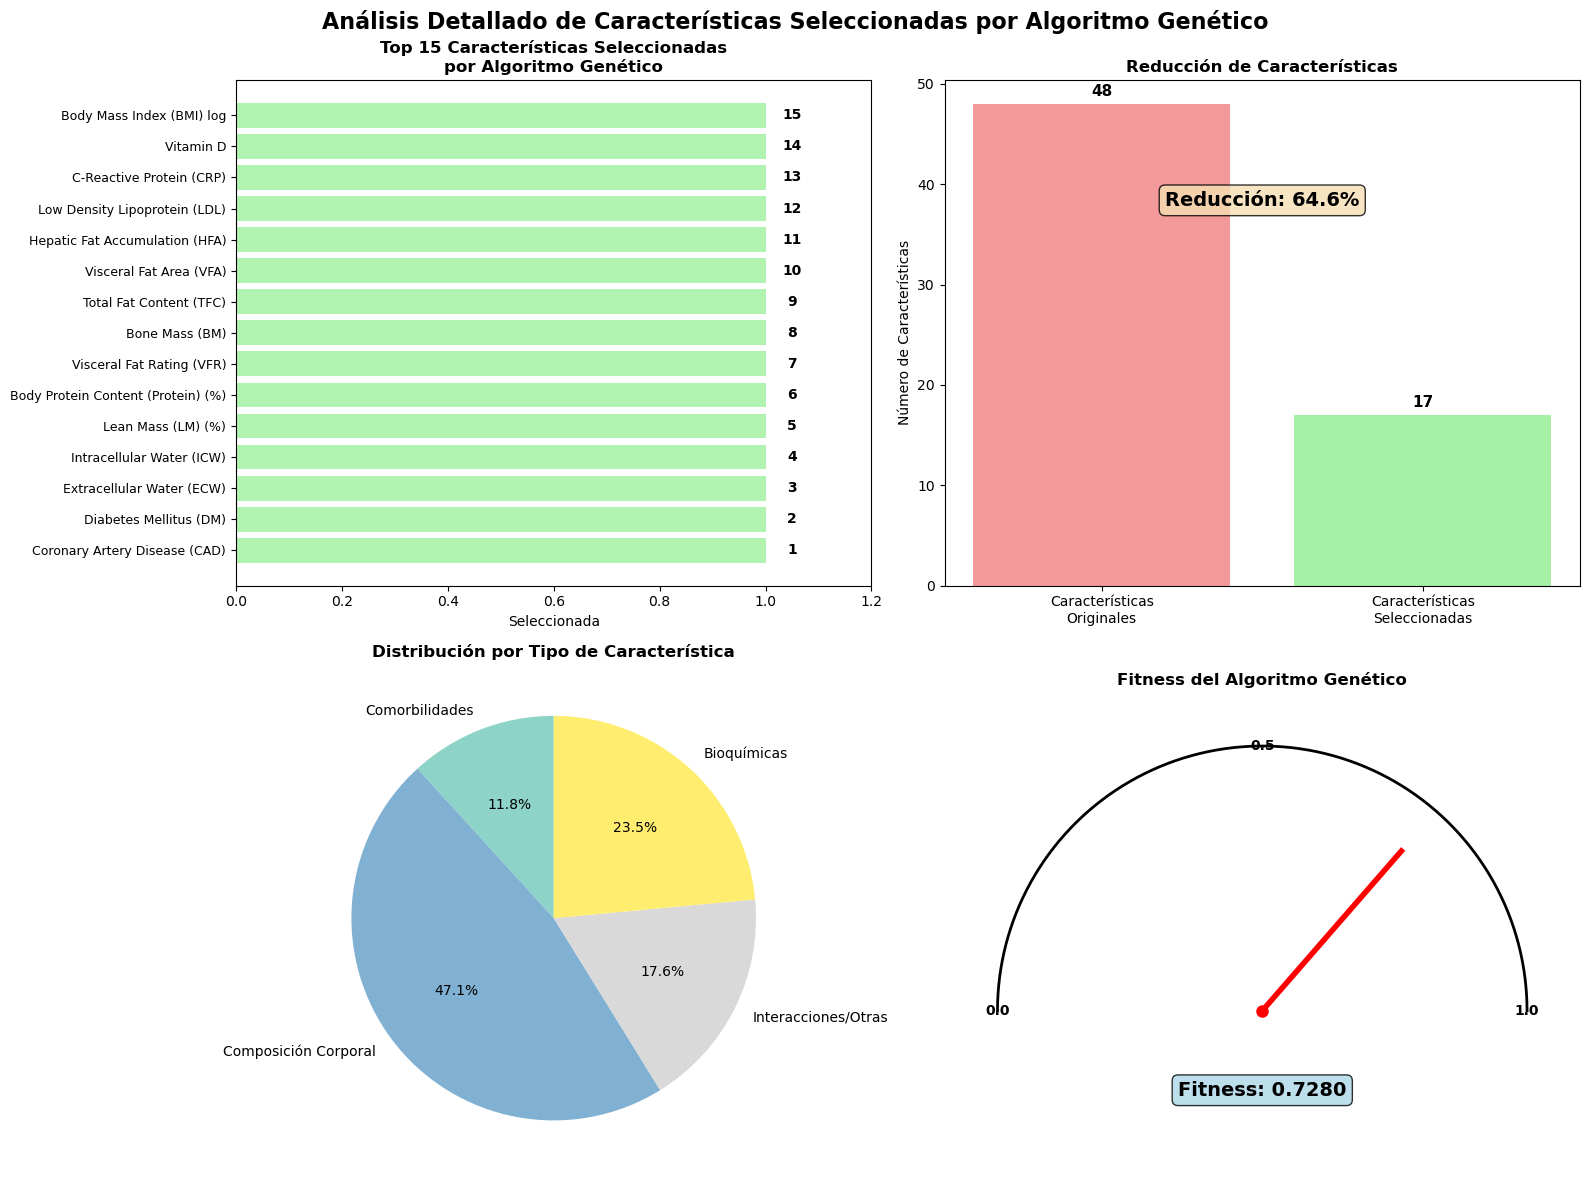


LISTA COMPLETA DE CARACTERÍSTICAS SELECCIONADAS (17):
----------------------------------------------------------------------
 1. Coronary Artery Disease (CAD)
 2. Diabetes Mellitus (DM)
 3. Extracellular Water (ECW)
 4. Intracellular Water (ICW)
 5. Lean Mass (LM) (%)
 6. Body Protein Content (Protein) (%)
 7. Visceral Fat Rating (VFR)
 8. Bone Mass (BM)
 9. Total Fat Content (TFC)
10. Visceral Fat Area (VFA)
11. Hepatic Fat Accumulation (HFA)
12. Low Density Lipoprotein (LDL)
13. C-Reactive Protein (CRP)
14. Vitamin D
15. Body Mass Index (BMI)_log
16. C-Reactive Protein (CRP)_squared
17. Lean Mass (LM) (%)_squared


In [31]:
# === GRÁFICA DE CARACTERÍSTICAS SELECCIONADAS POR ALGORITMO GENÉTICO ===
print("\nCARACTERÍSTICAS SELECCIONADAS POR ALGORITMO GENÉTICO")

# Verificar que tenemos los resultados del algoritmo genético
if 'ga_results' in locals() and 'selected_features' in ga_results:
    selected_features = ga_results['selected_features']
    n_selected = len(selected_features)
    
    print(f"Características seleccionadas: {n_selected}")
    print(f"Reducción lograda: {(1 - n_selected/n_features)*100:.1f}%")
    
    # Crear visualización de las características seleccionadas
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Lista de características seleccionadas (Top 15)
    features_to_show = selected_features[:15] if len(selected_features) > 15 else selected_features
    y_pos = np.arange(len(features_to_show))
    
    axes[0, 0].barh(y_pos, [1] * len(features_to_show), color='lightgreen', alpha=0.7)
    axes[0, 0].set_yticks(y_pos)
    axes[0, 0].set_yticklabels([f.replace('_', ' ') for f in features_to_show], fontsize=9)
    axes[0, 0].set_xlabel('Seleccionada')
    axes[0, 0].set_title(f'Top {len(features_to_show)} Características Seleccionadas\npor Algoritmo Genético', 
                        fontweight='bold', fontsize=12)
    axes[0, 0].set_xlim(0, 1.2)
    
    # Agregar numeración
    for i, (y, feature) in enumerate(zip(y_pos, features_to_show)):
        axes[0, 0].text(1.05, y, f'{i+1}', ha='center', va='center', fontweight='bold')
    
    # 2. Comparación: Originales vs Seleccionadas
    categories = ['Características\nOriginales', 'Características\nSeleccionadas']
    values = [n_features, n_selected]
    colors = ['lightcoral', 'lightgreen']
    
    bars = axes[0, 1].bar(categories, values, color=colors, alpha=0.8)
    axes[0, 1].set_title('Reducción de Características', fontweight='bold', fontsize=12)
    axes[0, 1].set_ylabel('Número de Características')
    
    # Agregar valores en las barras
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Agregar porcentaje de reducción
    reduction_pct = (1 - n_selected/n_features) * 100
    axes[0, 1].text(0.5, max(values) * 0.8, f'Reducción: {reduction_pct:.1f}%',
                    ha='center', va='center', fontweight='bold', fontsize=14,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # 3. Distribución por tipo de característica
    # Categorizar las características seleccionadas
    feature_types = {
        'Demográficas': ['Age', 'Gender'],
        'Comorbilidades': ['Comorbidity', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 
                          'Hypothyroidism', 'Coronary Artery Disease (CAD)'],
        'Composición Corporal': ['Body Mass Index (BMI)', 'Total Body Water (TBW)', 
                               'Extracellular Water (ECW)', 'Intracellular Water (ICW)',
                               'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)',
                               'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)',
                               'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)'],
        'Bioquímicas': ['Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)',
                       'High Density Lipoprotein (HDL)', 'Triglyceride',
                       'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)',
                       'Alkaline Phosphatase (ALP)', 'Creatinine',
                       'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)',
                       'Hemoglobin (HGB)', 'Vitamin D'],
        'Engineered': ['Body_Composition_Index', 'Metabolic_Risk_Index']
    }
    
    type_counts = {}
    for feature in selected_features:
        categorized = False
        for feature_type, type_features in feature_types.items():
            if any(base_feature in feature for base_feature in type_features) or feature in type_features:
                type_counts[feature_type] = type_counts.get(feature_type, 0) + 1
                categorized = True
                break
        if not categorized:
            type_counts['Interacciones/Otras'] = type_counts.get('Interacciones/Otras', 0) + 1
    
    # Crear gráfico de pastel
    labels = list(type_counts.keys())
    sizes = list(type_counts.values())
    colors_pie = plt.cm.Set3(np.linspace(0, 1, len(labels)))
    
    wedges, texts, autotexts = axes[1, 0].pie(sizes, labels=labels, autopct='%1.1f%%',
                                             colors=colors_pie, startangle=90)
    axes[1, 0].set_title('Distribución por Tipo de Característica', fontweight='bold', fontsize=12)
    
    # 4. Fitness del algoritmo genético
    if 'fitness' in ga_results and ga_results['fitness'] > 0:
        fitness_value = ga_results['fitness']
        
        # Crear gráfico de medidor de fitness
        theta = np.linspace(0, np.pi, 100)
        r = 1
        
        # Semicírculo base
        x_semi = r * np.cos(theta)
        y_semi = r * np.sin(theta)
        axes[1, 1].plot(x_semi, y_semi, 'k-', linewidth=2)
        
        # Aguja del medidor
        fitness_angle = np.pi * (1 - fitness_value)  # Invertir para que alto sea mejor
        needle_x = [0, 0.8 * np.cos(fitness_angle)]
        needle_y = [0, 0.8 * np.sin(fitness_angle)]
        axes[1, 1].plot(needle_x, needle_y, 'r-', linewidth=4)
        axes[1, 1].plot(0, 0, 'ro', markersize=8)
        
        # Etiquetas
        axes[1, 1].text(0, -0.3, f'Fitness: {fitness_value:.4f}', ha='center', va='center',
                        fontweight='bold', fontsize=14,
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        
        axes[1, 1].set_xlim(-1.2, 1.2)
        axes[1, 1].set_ylim(-0.5, 1.2)
        axes[1, 1].set_aspect('equal')
        axes[1, 1].axis('off')
        axes[1, 1].set_title('Fitness del Algoritmo Genético', fontweight='bold', fontsize=12)
        
        # Agregar escala
        axes[1, 1].text(-1, 0, '0.0', ha='center', va='center', fontweight='bold')
        axes[1, 1].text(1, 0, '1.0', ha='center', va='center', fontweight='bold')
        axes[1, 1].text(0, 1, '0.5', ha='center', va='center', fontweight='bold')
    else:
        axes[1, 1].text(0.5, 0.5, 'Fitness no disponible', ha='center', va='center',
                        fontsize=12, transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Fitness del Algoritmo Genético', fontweight='bold', fontsize=12)
    
    plt.suptitle('Análisis Detallado de Características Seleccionadas por Algoritmo Genético',
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Mostrar lista completa de características seleccionadas
    print(f"\nLISTA COMPLETA DE CARACTERÍSTICAS SELECCIONADAS ({n_selected}):")
    print("-" * 70)
    for i, feature in enumerate(selected_features, 1):
        print(f"{i:2d}. {feature}")
        
else:
    print("No se encontraron resultados del algoritmo genético")
    print("Ejecute primero la celda del algoritmo genético")

## 6. Implementación de Modelos Avanzados

### 6.1 Preparación de Datos para Modelos
Preparamos los conjuntos de entrenamiento y prueba con las características optimizadas.

In [32]:
# === PREPARACIÓN DE DATOS PARA MODELOS ===
print("PREPARACIÓN DE DATOS PARA MODELOS")

# Usar características optimizadas por algoritmo genético
X_final = X_optimized.copy()
y_final = y_for_selection.copy()

print(f"Características finales: {X_final.shape[1]}")
print(f"Muestras totales: {len(y_final)}")

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)

print(f"\nDivisión del dataset:")
print(f"  • Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(y_final)*100:.1f}%)")
print(f"  • Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(y_final)*100:.1f}%)")

# Verificar distribución de clases
train_dist = Counter(y_train)
test_dist = Counter(y_test)

print(f"\nDistribución de clases:")
print(f"  Entrenamiento: {train_dist}")
print(f"  Prueba: {test_dist}")

# Usar datos sin balanceo (dataset ya está balanceado)
X_train_balanced = X_train.copy()
y_train_balanced = y_train.copy()
X_test_final = X_test.copy()
y_test_final = y_test.copy()

print(f"\nDatos finales para entrenamiento:")
print(f"  • X_train: {X_train_balanced.shape}")
print(f"  • y_train: {len(y_train_balanced)} - {Counter(y_train_balanced)}")
print(f"  • X_test: {X_test_final.shape}")
print(f"  • y_test: {len(y_test_final)} - {Counter(y_test_final)}")

# Escalar datos para modelos que lo requieren
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train_balanced)
X_test_scaled = scaler_final.transform(X_test_final)

PREPARACIÓN DE DATOS PARA MODELOS
Características finales: 17
Muestras totales: 319

División del dataset:
  • Entrenamiento: 255 muestras (79.9%)
  • Prueba: 64 muestras (20.1%)

Distribución de clases:
  Entrenamiento: Counter({0: 129, 1: 126})
  Prueba: Counter({1: 32, 0: 32})

Datos finales para entrenamiento:
  • X_train: (255, 17)
  • y_train: 255 - Counter({0: 129, 1: 126})
  • X_test: (64, 17)
  • y_test: 64 - Counter({1: 32, 0: 32})


### 6.2 Modelo 1: XGBoost Classifier
Implementamos XGBoost con optimización de hiperparámetros.

In [33]:
# === IMPLEMENTACIÓN Y OPTIMIZACIÓN DE XGBOOST ===
print("MODELO 1: XGBOOST CLASSIFIER")

try:
    # Modelo XGBoost inicial    
    xgb_initial = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss',
        verbosity=0
    )
    
    # Entrenamiento inicial
    xgb_initial.fit(X_train_balanced, y_train_balanced)
    
    # Predicciones iniciales
    y_pred_xgb_initial = xgb_initial.predict(X_test_final)
    y_pred_proba_xgb_initial = xgb_initial.predict_proba(X_test_final)[:, 1]
    
    # Métricas iniciales
    acc_xgb_initial = accuracy_score(y_test_final, y_pred_xgb_initial)
    prec_xgb_initial = precision_score(y_test_final, y_pred_xgb_initial, average='weighted')
    rec_xgb_initial = recall_score(y_test_final, y_pred_xgb_initial, average='weighted')
    f1_xgb_initial = f1_score(y_test_final, y_pred_xgb_initial, average='weighted')
    
    try:
        roc_auc_xgb_initial = roc_auc_score(y_test_final, y_pred_proba_xgb_initial)
    except:
        roc_auc_xgb_initial = 0.0
    
    print(f"\nRESULTADOS XGBOOST INICIAL:")
    print(f"  • Accuracy: {acc_xgb_initial:.4f}")
    print(f"  • Precision: {prec_xgb_initial:.4f}")
    print(f"  • Recall: {rec_xgb_initial:.4f}")
    print(f"  • F1-Score: {f1_xgb_initial:.4f}")
    print(f"  • ROC-AUC: {roc_auc_xgb_initial:.4f}")
    
    # Optimización de hiperparámetros
    print(f"\nOPTIMIZACIÓN DE HIPERPARÁMETROS XGBOOST")
    
    # Parámetros para optimizar (reducidos para velocidad)
    param_grid_xgb = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
    }
    
    # Grid Search con validación cruzada
    grid_xgb = GridSearchCV(
        xgb.XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0),
        param_grid_xgb,
        cv=3,  # Reducido para velocidad
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=0
    )
    
    grid_xgb.fit(X_train_balanced, y_train_balanced)
    
    # Mejor modelo
    best_xgb = grid_xgb.best_estimator_
    
    print(f"\nMEJORES HIPERPARÁMETROS XGBOOST:")
    for param, value in grid_xgb.best_params_.items():
        print(f"  • {param}: {value}")
    print(f"\nMejor puntuación F1 (CV): {grid_xgb.best_score_:.4f}")
    
    # Evaluar mejor modelo
    y_pred_xgb_best = best_xgb.predict(X_test_final)
    y_pred_proba_xgb_best = best_xgb.predict_proba(X_test_final)[:, 1]
    
    # Métricas optimizadas
    acc_xgb_best = accuracy_score(y_test_final, y_pred_xgb_best)
    prec_xgb_best = precision_score(y_test_final, y_pred_xgb_best, average='weighted')
    rec_xgb_best = recall_score(y_test_final, y_pred_xgb_best, average='weighted')
    f1_xgb_best = f1_score(y_test_final, y_pred_xgb_best, average='weighted')
    bal_acc_xgb_best = balanced_accuracy_score(y_test_final, y_pred_xgb_best)
    
    try:
        roc_auc_xgb_best = roc_auc_score(y_test_final, y_pred_proba_xgb_best)
    except:
        roc_auc_xgb_best = 0.0
    
    print(f"\nRESULTADOS XGBOOST OPTIMIZADO:")
    print(f"  • Accuracy: {acc_xgb_best:.4f}")
    print(f"  • Balanced Accuracy: {bal_acc_xgb_best:.4f}")
    print(f"  • Precision: {prec_xgb_best:.4f}")
    print(f"  • Recall: {rec_xgb_best:.4f}")
    print(f"  • F1-Score: {f1_xgb_best:.4f}")
    print(f"  • ROC-AUC: {roc_auc_xgb_best:.4f}")
    
    # Importancia de características
    feature_importance_xgb = pd.DataFrame({
        'feature': X_train_balanced.columns,
        'importance': best_xgb.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (XGBoost):")
    for i, (_, row) in enumerate(feature_importance_xgb.head(10).iterrows(), 1):
        print(f"  {i:2d}. {row['feature']}: {row['importance']:.4f}")
    
    xgb_available = True
    
except Exception as e:
    print(f"\nError con XGBoost: {e}")
    print("Continuando sin XGBoost...")
    
    # Valores por defecto si XGBoost falla
    acc_xgb_initial = acc_xgb_best = 0.0
    prec_xgb_initial = prec_xgb_best = 0.0
    rec_xgb_initial = rec_xgb_best = 0.0
    f1_xgb_initial = f1_xgb_best = 0.0
    bal_acc_xgb_best = 0.0
    roc_auc_xgb_initial = roc_auc_xgb_best = 0.0
    
    xgb_available = False

MODELO 1: XGBOOST CLASSIFIER

RESULTADOS XGBOOST INICIAL:
  • Accuracy: 0.7500
  • Precision: 0.7500
  • Recall: 0.7500
  • F1-Score: 0.7500
  • ROC-AUC: 0.8574

OPTIMIZACIÓN DE HIPERPARÁMETROS XGBOOST

MEJORES HIPERPARÁMETROS XGBOOST:
  • learning_rate: 0.2
  • max_depth: 9
  • n_estimators: 100
  • subsample: 1.0

Mejor puntuación F1 (CV): 0.8146

RESULTADOS XGBOOST OPTIMIZADO:
  • Accuracy: 0.7812
  • Balanced Accuracy: 0.7812
  • Precision: 0.7812
  • Recall: 0.7812
  • F1-Score: 0.7812
  • ROC-AUC: 0.8574

TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES (XGBoost):
   1. C-Reactive Protein (CRP): 0.2392
   2. Bone Mass (BM): 0.1095
   3. Vitamin D: 0.0904
   4. Body Mass Index (BMI)_log: 0.0672
   5. Diabetes Mellitus (DM): 0.0638
   6. Total Fat Content (TFC): 0.0597
   7. Visceral Fat Rating (VFR): 0.0594
   8. Extracellular Water (ECW): 0.0593
   9. Intracellular Water (ICW): 0.0586
  10. Visceral Fat Area (VFA): 0.0477


### 6.3 Modelo 2: Red Neuronal (MLP)
Implementamos una red neuronal con regularización y optimización.

In [34]:
# === RED NEURONAL (MLP) ===
print("\nMODELO 2: RED NEURONAL (MLP)")

# Red Neuronal con optimización
n_features = X_train_scaled.shape[1]
hidden_layer_sizes = (min(100, n_features*2), min(50, n_features))

nn_model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

try:
    # Entrenar el modelo
    nn_model.fit(X_train_scaled, y_train_balanced)
    
    # Predicciones
    y_pred_nn = nn_model.predict(X_test_scaled)
    y_pred_proba_nn = nn_model.predict_proba(X_test_scaled)[:, 1]
    
    # Métricas de la red neuronal
    acc_nn = accuracy_score(y_test_final, y_pred_nn)
    prec_nn = precision_score(y_test_final, y_pred_nn, average='weighted')
    rec_nn = recall_score(y_test_final, y_pred_nn, average='weighted')
    f1_nn = f1_score(y_test_final, y_pred_nn, average='weighted')
    bal_acc_nn = balanced_accuracy_score(y_test_final, y_pred_nn)
    
    try:
        roc_auc_nn = roc_auc_score(y_test_final, y_pred_proba_nn)
    except:
        roc_auc_nn = 0.0
    
    print(f"\nRESULTADOS RED NEURONAL:")
    print(f"  • Arquitectura: {hidden_layer_sizes}")
    print(f"  • Iteraciones: {nn_model.n_iter_}")
    print(f"  • Accuracy: {acc_nn:.4f}")
    print(f"  • Balanced Accuracy: {bal_acc_nn:.4f}")
    print(f"  • Precision: {prec_nn:.4f}")
    print(f"  • Recall: {rec_nn:.4f}")
    print(f"  • F1-Score: {f1_nn:.4f}")
    print(f"  • ROC-AUC: {roc_auc_nn:.4f}")
    
    nn_available = True
    
except Exception as e:
    print(f"\nError con Red Neuronal: {e}")
    
    # Valores por defecto si falla
    acc_nn = prec_nn = rec_nn = f1_nn = bal_acc_nn = roc_auc_nn = 0.0
    nn_available = False


MODELO 2: RED NEURONAL (MLP)

RESULTADOS RED NEURONAL:
  • Arquitectura: (34, 17)
  • Iteraciones: 12
  • Accuracy: 0.5625
  • Balanced Accuracy: 0.5625
  • Precision: 0.5727
  • Recall: 0.5625
  • F1-Score: 0.5466
  • ROC-AUC: 0.6084


## 7. Evaluación y Comparación de Modelos

### 7.1 Comparación Detallada de Resultados
Comparamos el rendimiento de todos los modelos implementados.

COMPARACIÓN EXHAUSTIVA DE MODELOS

TABLA DE RESULTADOS COMPARATIVA:
               Modelo  Accuracy  Precision  Recall  F1_Score  ROC_AUC  \
0     XGBoost Inicial    0.7500     0.7500  0.7500    0.7500   0.8574   
1  XGBoost Optimizado    0.7812     0.7812  0.7812    0.7812   0.8574   
2        Red Neuronal    0.5625     0.5727  0.5625    0.5466   0.6084   

   Balanced_Accuracy  
0             0.7500  
1             0.7812  
2             0.5625  

MEJOR MODELO: XGBoost Optimizado
F1-Score: 0.7812


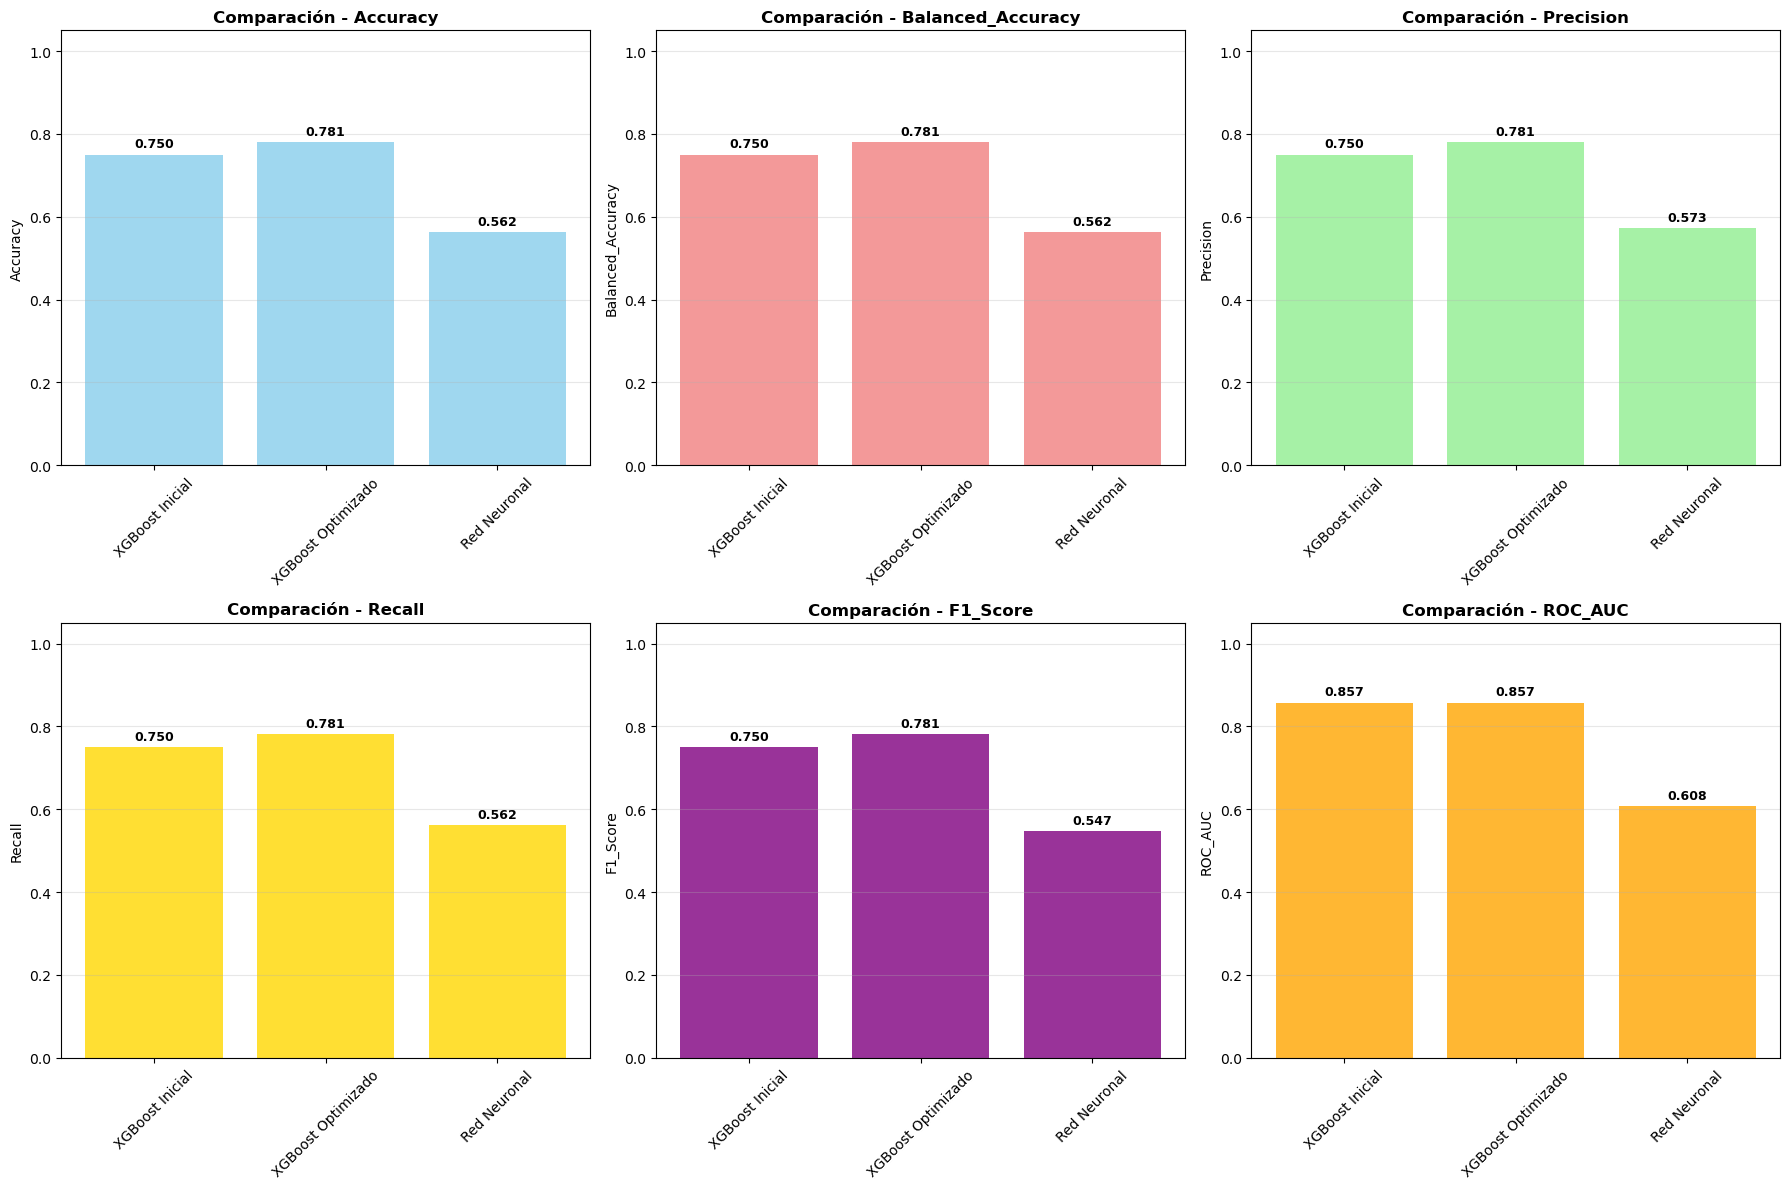

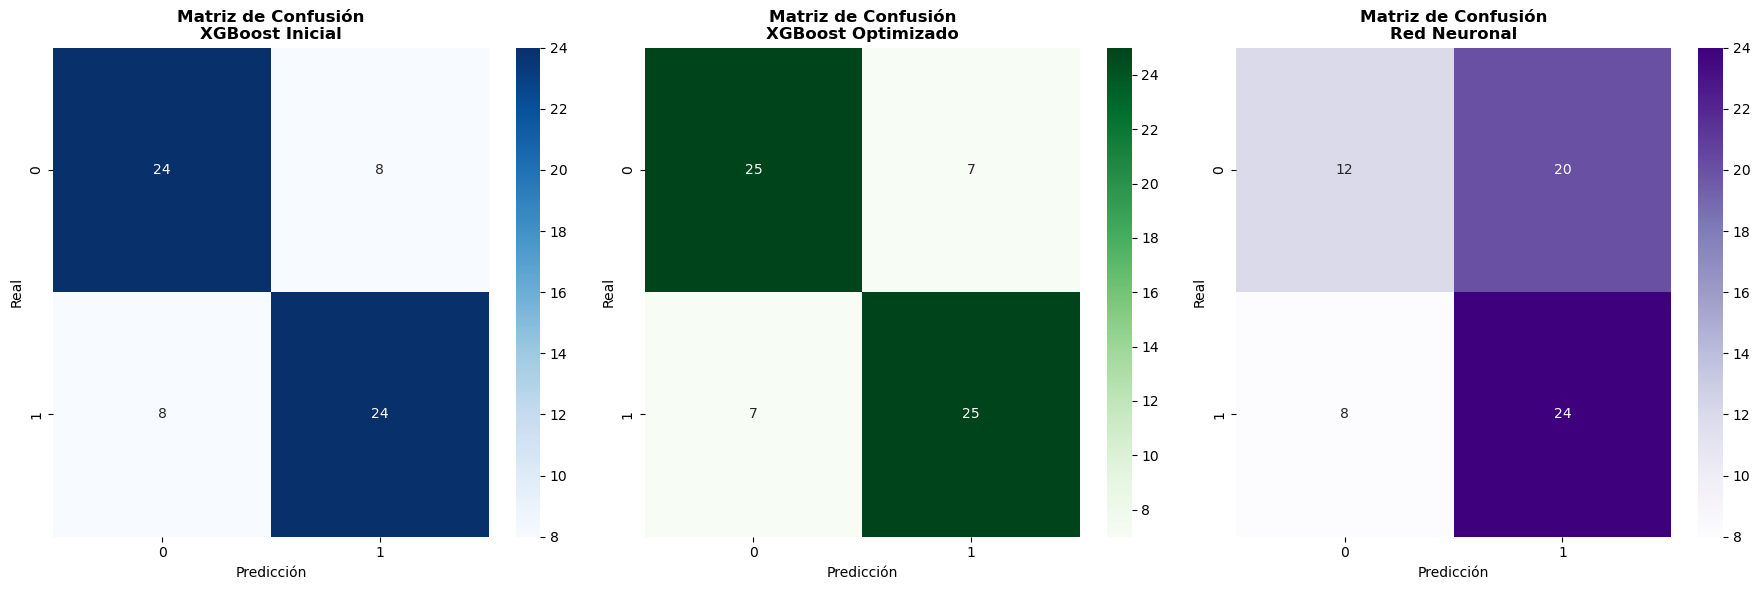

In [35]:
# === COMPARACIÓN EXHAUSTIVA DE MODELOS ===
print("COMPARACIÓN EXHAUSTIVA DE MODELOS")

# Compilar todos los resultados
models_data = []

if xgb_available:
    models_data.extend([
        ['XGBoost Inicial', acc_xgb_initial, prec_xgb_initial, rec_xgb_initial, f1_xgb_initial, roc_auc_xgb_initial, balanced_accuracy_score(y_test_final, y_pred_xgb_initial)],
        ['XGBoost Optimizado', acc_xgb_best, prec_xgb_best, rec_xgb_best, f1_xgb_best, roc_auc_xgb_best, bal_acc_xgb_best]
    ])

if nn_available:
    models_data.append(['Red Neuronal', acc_nn, prec_nn, rec_nn, f1_nn, roc_auc_nn, bal_acc_nn])

if models_data:
    results_comparison = pd.DataFrame(models_data, columns=[
        'Modelo', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC', 'Balanced_Accuracy'
    ])
    
    print("\nTABLA DE RESULTADOS COMPARATIVA:")
    print(results_comparison.round(4))
    
    # Identificar el mejor modelo
    best_model_idx = results_comparison['F1_Score'].idxmax()
    best_model_name = results_comparison.loc[best_model_idx, 'Modelo']
    best_f1_score = results_comparison.loc[best_model_idx, 'F1_Score']
    
    print(f"\nMEJOR MODELO: {best_model_name}")
    print(f"F1-Score: {best_f1_score:.4f}")
    
    # Visualización comparativa
    if len(results_comparison) > 1:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Métricas principales
        metrics = ['Accuracy', 'Balanced_Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
        colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple', 'orange']
        
        for i, metric in enumerate(metrics):
            row = i // 3
            col = i % 3
            
            bars = axes[row, col].bar(results_comparison['Modelo'], 
                                     results_comparison[metric], 
                                     color=colors[i], alpha=0.8)
            axes[row, col].set_title(f'Comparación - {metric}', fontweight='bold')
            axes[row, col].set_ylabel(metric)
            axes[row, col].tick_params(axis='x', rotation=45)
            axes[row, col].set_ylim(0, 1.05)
            axes[row, col].grid(axis='y', alpha=0.3)
            
            # Agregar valores en las barras
            for bar, value in zip(bars, results_comparison[metric]):
                axes[row, col].text(bar.get_x() + bar.get_width()/2, 
                                   bar.get_height() + 0.01, 
                                   f'{value:.3f}', 
                                   ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    # Matrices de confusión comparativas
    if xgb_available and nn_available:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # XGBoost Inicial
        cm_xgb_initial = confusion_matrix(y_test_final, y_pred_xgb_initial)
        sns.heatmap(cm_xgb_initial, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title('Matriz de Confusión\nXGBoost Inicial', fontweight='bold')
        axes[0].set_xlabel('Predicción')
        axes[0].set_ylabel('Real')
        
        # XGBoost Optimizado
        cm_xgb_best = confusion_matrix(y_test_final, y_pred_xgb_best)
        sns.heatmap(cm_xgb_best, annot=True, fmt='d', cmap='Greens', ax=axes[1])
        axes[1].set_title('Matriz de Confusión\nXGBoost Optimizado', fontweight='bold')
        axes[1].set_xlabel('Predicción')
        axes[1].set_ylabel('Real')
        
        # Red Neuronal
        cm_nn = confusion_matrix(y_test_final, y_pred_nn)
        sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples', ax=axes[2])
        axes[2].set_title('Matriz de Confusión\nRed Neuronal', fontweight='bold')
        axes[2].set_xlabel('Predicción')
        axes[2].set_ylabel('Real')
        
        plt.tight_layout()
        plt.show()
        
else:
    print("No hay modelos disponibles para comparar")
    best_model_name = "Ninguno"
    best_f1_score = 0.0